# 手写卷积实现高斯滤波和拉普拉斯边缘检测

In [15]:
# 导入必要库
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline
np.set_printoptions(suppress=True, threshold=np.nan)

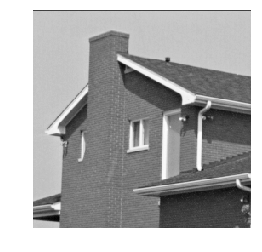

In [16]:
#img = cv2.imread('.\\data\\5.3.01.tiff',0)
img = cv2.imread('.\\data\\4.1.05.tiff')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

col,row = img.shape

plt.imshow(img,cmap = "gray")
plt.axis("off")#去除坐标轴
plt.show()


(258, 258)


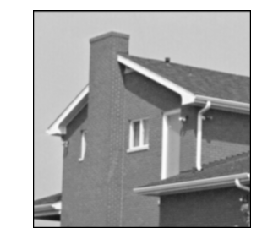

In [17]:
img_padding = np.zeros((img.shape[0]+2,img.shape[1]+2))
img_padding[1:img_padding.shape[0]-1,1:img_padding.shape[1]-1] = img

dst = np.zeros_like(img_padding)

fil_guass = np.array([[  1, 2, 1],                        #Sobel是卷积核
                      [  2, 4, 2],
                      [  1, 2, 1]])
print(img_padding.shape)
for i in range(1,img_padding.shape[0]-1):
    for j in range(1,img_padding.shape[1]-1):
        dst[i,j] = np.sum(img_padding[i-1:i+2,j-1:j+2] * fil_guass )/ 16
        

plt.imshow(dst,cmap = "gray")
plt.axis("off")#去除坐标轴
plt.show()


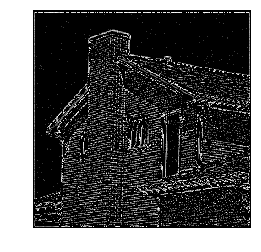

In [21]:
img_lpls = np.zeros((img.shape[0]+2,img.shape[1]+2),dtype = np.int16)
img_temp = img_padding.copy()


for i in range(1,img_padding.shape[0]-1):
    for j in range(1,img_padding.shape[1]-1):
        img_lpls[i,j] = (img_temp[i-1,j-1] + img_temp[i-1,j] + img_temp[i-1,j+1]+ \
                           img_temp[i,j-1] + img_temp[i,j]*(-8) +  img_temp[i,j+1] + \
                           img_temp[i+1,j-1] + img_temp[i+1,j] +  img_temp[i+1,j+1])

img_lpls = -img_lpls
img_lpls = img_lpls%255
img_lpls[img_lpls > 100] = 0
img_lpls[img_lpls < 20] = 0

plt.imshow(img_lpls,cmap = "gray")
plt.axis("off")#去除坐标轴
plt.show()  
#print(img_lpls[:,:])

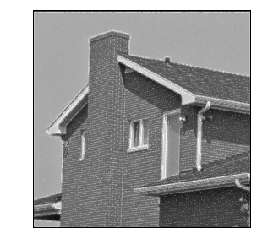

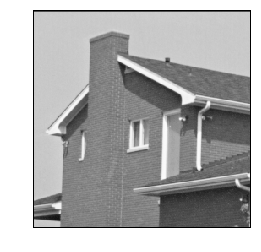

In [23]:
t = 0.5

dst = img_temp + t * img_lpls

plt.imshow(dst,cmap = "gray")
plt.axis("off")#去除坐标轴
plt.show()  

plt.imshow(img_padding,cmap = "gray")
plt.axis("off")#去除坐标轴
plt.show()
